# 名企作业 2020-11-21, 石敏

## Action 2

## 对Titanic数据进行清洗，使用之前介绍过的10种模型中的至少2种（包括TPOT）
数据集地址：https://github.com/cystanford/Titanic_Data

数据集中的字段描述： PassengerId 乘客编号 Survived 是否幸存 Pclass 船票等级 Name 乘客姓名 Sex 乘客性别 SibSp 亲戚数量（兄妹、配偶数） Parch 亲戚数量（父母、子女数） Ticket 船票号码 Fare 船票价格 Cabin 船舱 Embarked 登录港口

In [1]:
# MLFrame.py 是根据核心课上学习的内容，我自己改写的一个不同AI算法的调用框架
import MLFrame as mlf
ml = mlf.MLearning()

In [2]:
ml.read_train('./titanic/train.csv')
ml.read_test('./titanic/test.csv')

The shape of train set：(891, 12)
The shape of test set：(418, 11)


In [3]:
ml.train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


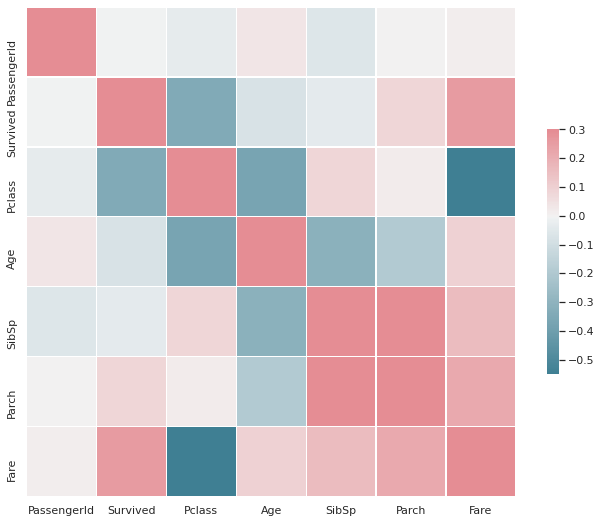

In [4]:
ml.train_corr_graph()

In [5]:
ml.test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


由上述数据可以得知需要预测的是“是否能幸存”
查空值， 查异常值， Label_Encode for Sex, Embarked

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [6]:
# Merge train and test
ml.add_label_for_test('Survived')
ml.merge_train_and_test()

In [7]:
ml.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [8]:
ml.data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
ml.data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
# 数据清洗, Age , Cabin, Embarked 有空值
ml.fill_none('Age', ml.data['Age'].mean())
ml.fill_none('Fare', ml.data['Fare'].mean())
ml.fill_none('Embarked', ml.data['Embarked'].value_counts().index[0])

# Cabin的值缺失了超过77%： （1308 - 295）/ 1308， 所以补齐并没有实际意义
# 票号不统一，可以试一试，也许有一线可能性，比如编号小的是头等舱，生还机率大。
# 但在此练习中，Fare应该能体现船舱级别， 因此扔掉此列
# 名字，没法转成数字，也不会对结果产生什么影响，所以也去掉
ml.drop_column(['Ticket', 'Cabin', 'Name'])

In [11]:
ml.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 92.2+ KB


In [12]:
# Label-Encode
ml.label_encoder(['Sex', 'Embarked'])
# Min_Min_Scaler
ml.min_max_scaler(['Fare'])
# One-Hot
ml.one_hot(['Pclass', 'Sex', 'Embarked'])

In [13]:
ml.data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,1,0,22.000000,1,0,0.014151,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,0.139136,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,0.015469,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,0.103644,1,0,0,1,0,0,0,1
4,5,0,35.000000,0,0,0.015713,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,-1,29.881138,0,0,0.015713,0,0,1,0,1,0,0,1
1305,1306,-1,39.000000,0,0,0.212559,1,0,0,1,0,1,0,0
1306,1307,-1,38.500000,0,0,0.014151,0,0,1,0,1,0,0,1
1307,1308,-1,29.881138,0,0,0.015713,0,0,1,0,1,0,0,1


In [14]:
# 特征选择
ml.set_features_without(['PassengerId','Survived'])

Features：12


['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2']

## Logistic Regression 逻辑回归

In [15]:
ml.predict('lr')
ml.save_predict('PassengerId', 'Survived', './titanic/baseline_lr.csv')

LR AUC:           0.7797011136114477


## ID3 决策树


In [16]:
ml.predict('id3_c')
ml.save_predict('PassengerId', 'Survived', './titanic/baseline_id3_c.csv')

LR AUC:           0.7477352720558538


## Adaboost

In [17]:
ml.predict('ada_c')
ml.save_predict('PassengerId', 'Survived', './titanic/baseline_ada_c.csv')

LR AUC:           0.7654203450464486


## XGBoost 

In [18]:
pred_lr = ml.predict('xgb_c')
ml.save_predict('PassengerId', 'Survived', './titanic/baseline_xgb_c.csv')

LR AUC:           0.776296809185852


## TPOT

In [19]:
#This block is already excuted. It was commented, because of slow excution
#ml.run_tpot('./tpot_mnist_pipeline.py')

### Result of TPOT
- Generation 1 - Current best internal CV score: 0.8105677419354839
- Generation 2 - Current best internal CV score: 0.8153419354838709
- Generation 3 - Current best internal CV score: 0.8154064516129031
- Generation 4 - Current best internal CV score: 0.8154064516129031
- Generation 5 - Current best internal CV score: 0.8249935483870969
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, nthread=1, subsample=0.8500000000000001)
0.8283582089552238

NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

Average CV score on the training set was: 0.8249935483870969
exported_pipeline = XGBClassifier(learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, nthread=1, subsample=0.8500000000000001)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

### Call XGBClassifier one more time, and the parameter are according to the advice from TPOP above.

In [20]:
modelSetup = mlf.ModelSetup()
modelSetup.set_values('xgb_c', 'learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, nthread=1, subsample=0.8500000000000001')

ml.predict('xgb_c', modelSetup)
ml.save_predict('PassengerId', 'Survived', './titanic/baseline_xgb_c_tpot.csv')

LR AUC:           0.8137730079049104
